## Part 1 : 

### Importing required libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [34]:
df=pd.read_csv(r"D:\DOWNLOADS\osteoporosis.csv")

In [35]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [37]:
df.drop(columns = ['Id'], inplace = True)

In [38]:
encoder = LabelEncoder()
for col in df.columns[1:-1]:
    df[col] = encoder.fit_transform(df[col].values)

df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


In [39]:
X=df.drop('Osteoporosis',axis=1)

In [40]:
y=df['Osteoporosis'].values.reshape(X.shape[0], 1)

### Splitting into training and testing dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Standardising

In [42]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Neural Network from scratch

In [43]:
class NeuralNetwork():
    '''
    A two layer neural network having 
    - input layer ( 14 nodes)
    - hidden layer (8 nodes)
    - output layer (1 node) (binary classification)
    '''
        
    def __init__(self, layers=[14,8,1], lr=0.005, epochs=200):
        self.parameters = {}
        self.lr = lr
        self.epochs = epochs
        self.losses = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def parameter_init(self):
        '''
        Initialize the weights randomly using numpy
        W1- weights of the nodes in input layer (8,5)
        b1- biases of nodes in hidden layer
        W2- weights of the nodes in hidden layer (5,1)
        b2- biases of nodes in output layer
        '''
        np.random.seed(42) # Seed the random number generator
        self.parameters["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.parameters['b1']  =np.random.randn(self.layers[1],)
        self.parameters['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.parameters['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self,Z):
        '''
        ReLU (Rectified Linear Unit)
        It will return the value passed to it if it is greater than zero; 
        otherwise, it returns zero.
        The weighter sum and bias term from the input layer is passed to this activation function
        '''
        return np.maximum(0,Z)

    def relu_der(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
        """
        When our neural network gives 0 value to log, this results in infinity which affects the training and loss becomes inf.
        To avoid this, if our value is 0, then it is replaced with an extremely small value"""
        ETA = 0.00000001
        return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        Sigmoid function
        Take a real number and squashes it to value between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        #Performs the forward propagation
        
        Z1 = self.X.dot(self.parameters['W1']) + self.parameters['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.parameters['W2']) + self.parameters['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.parameters['Z1'] = Z1
        self.parameters['Z2'] = Z2
        self.parameters['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        # Computes the derivatives and update weights and bias according.
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.parameters['W2'].T)
        dl_wrt_w2 = self.parameters['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.relu_der(self.parameters['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #gradient descent weight optimisation
        self.parameters['W1'] = self.parameters['W1'] - self.lr * dl_wrt_w1
        self.parameters['W2'] = self.parameters['W2'] - self.lr * dl_wrt_w2
        self.parameters['b1'] = self.parameters['b1'] - self.lr * dl_wrt_b1
        self.parameters['b2'] = self.parameters['b2'] - self.lr * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.parameter_init() 

        for i in range(self.epochs):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.losses.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.parameters['W1']) + self.parameters['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.parameters['W2']) + self.parameters['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.losses)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show() 

In [44]:
nn=NeuralNetwork() 
nn.fit(X_train, y_train)

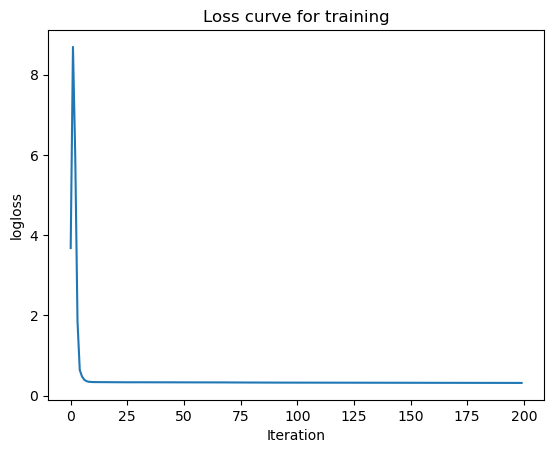

In [45]:
nn.plot_loss()

In [46]:
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)

print("Train accuracy is {}".format(nn.acc(y_train, train_pred)))
print("Test accuracy is {}".format(nn.acc(y_test, test_pred)))

conf_matrix = confusion_matrix(y_test ,test_pred)
print(conf_matrix)

Train accuracy is 86
Test accuracy is 83
[[193  12]
 [ 53 134]]


C:\Users\MSI\AppData\Local\Temp\ipykernel_12120\3831387372.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  acc = int(sum(y == yhat) / len(y) * 100)


## Part 2 : 

In [47]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [48]:
df2=pd.read_csv(r"D:\DOWNLOADS\osteoporosis.csv")

In [49]:
df2.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [50]:
df2.drop(columns = ['Id'], inplace = True)

In [51]:
encoder = LabelEncoder()
for col in df2.columns[1:-1]:
    df2[col] = encoder.fit_transform(df2[col].values)

df2.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


In [52]:
X=df2.drop('Osteoporosis',axis=1)

In [53]:
y=df2['Osteoporosis'].values.reshape(X.shape[0], 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(1566, 14)

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
ann = Sequential()
ann.add(Dense(units=14, activation='relu',
 input_dim=14))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

C:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
ann.compile(optimizer='sgd', loss=
 'binary_crossentropy',
 metrics=['accuracy'])

In [59]:
history=ann.fit(X_train,y_train, epochs=200,batch_size=32)

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.4874 - loss: 0.8390 
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5849 - loss: 0.6780
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.6592 - loss: 0.6318
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.6686 - loss: 0.6149
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6958 - loss: 0.5892
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7178 - loss: 0.5711
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.7203 - loss: 0.5574
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.7456 - loss: 0.5364
Epoch 9/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7497 - loss: 0.5266
Epoch 10/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7596 - loss: 0.5056
Epoch 11/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.7683 - loss: 0.4949
Epoch 12/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 

In [60]:
loss = history.history['loss']

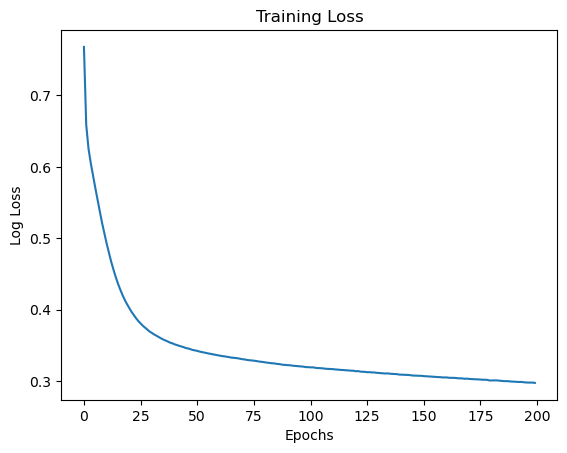

In [61]:
plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.show()

In [62]:
losstest, accuracy = ann.evaluate(X_test, y_test,verbose=0)

In [63]:
print("Test Loss:", losstest)
print("Test Accuracy:", accuracy)

Test Loss: 0.40532320737838745
Test Accuracy: 0.8188775777816772


## Comparative Analysis : 

Neural Networks implemented from scratch and using the keras library : 
- Used the same number of nodes in input, hidden and output layer (14,8,1)
- Used the same gradient descent optimisation for weights

From scratch : 
- Train set accuracy - 87
- Test set accuracy - 83

Using keras (tensorflow) library : 
- Train set accuracy - 86.2
- Test set accuracy - 80.3

Insights : 
- The neural network implemented from scratch slightly outperformed the Keras implementation on the training set, achieving a higher accuracy by 0.8%.
- However, on the test set, the from-scratch implementation also outperformed the Keras implementation by 2.7%, suggesting that the network implemented from scratch generalized better to unseen data.

- The slightly better performance of the from-scratch implementation on both training and test sets suggests that it might have learned more robust features or avoided overfitting better than the Keras implementation.

Conclusion: 
In this particular scenario, the neural network implemented from scratch yielded better results. But it is possible that on improving the parameters (like using adam instead of sgd for optimisation and so on) could make the keras library neural network yield better results. 